In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def fsr_fast_pv(pv_orig, m, gam0 = 0.05, digits = 4, printout = True, plot = True):
    m1 = len(pv_orig)
    pvm = np.zeros(m1)

    # create monotone p-values
    for i in range(0, m1):
        pvm[i] = np.max(pv_orig[0:(i+1)])
    alpha = np.concatenate([np.array([0]), pvm])
    ng = len(alpha)
    
    # calculate model size
    S = np.zeros(ng)
    for j in range(1, ng):
        S[j] = sum(pvm <= alpha[j])
        
    # calculate gamma hat
    ghat = (m - S)*alpha/(1 + S)
    
    # add additional points to make jumps
    alpha2 = alpha[1:ng] - 0.0000001
    ghat2 = (m - S[0:(ng - 1)])*alpha2/(1 + S[0:(ng - 1)])
    zp = pd.DataFrame({'a': np.concatenate([alpha, alpha2]), 'g': np.concatenate([ghat, ghat2])})
    zp.sort_values(by =['a', 'g'], ascending = [True, False], inplace = True)
    
    # largest gamma hat and index
    gamma_max = np.argmax(zp['g'])
    
    alpha_max = zp['a'][gamma_max]

    # model size with ghat just below gam0
    ind = np.logical_and(ghat <= gam0, alpha <= alpha_max)*1
    Sind = S[np.max(np.where(ind > 0))]
    
    # calculate alpha_F
    alpha_fast = (1 + Sind)*gam0/(m - Sind)
    
    # size of model including intercept
    size1 = sum(pvm <= alpha_fast)
    
    # generate plot
    if plot==True:
        plt.plot(zp['a'], zp['g'], marker = 'o', markersize = 6)
        plt.ylabel('Estimated Gamma')
        plt.xlabel('Alpha')
        pass

    df1 = pd.DataFrame({'pval': pv_orig, 'pvmax': pvm, 'ghigh': ghat2, 'glow': ghat[1:ng]}, columns = ['pval', 'pvmax', 'ghigh', 'glow'])
    df2 = pd.DataFrame({'m1': m1, 'm': m, 'gam0': gam0, 'size': size1, 'alphamax': alpha_max, 'alpha_fast': alpha_fast}, columns = ['m1', 'm', 'gam0', 'size', 'alphamax', 'alpha_fast'], index=[0])
    if printout == True:
        print(df1,df2)
    return(np.round(df1, digits), np.round(df2, digits))

In [3]:
pv_orig = np.array([0,.0001,.0116,.0053,.0025,.0433,.0527,.1056,.0826,.0536,.2350])
m = 19
gam0 = 0.05
digits = 4

      pval   pvmax   ghigh    glow
0   0.0000  0.0000 -0.0000  0.0000
1   0.0001  0.0001  0.0009  0.0006
2   0.0116  0.0116  0.0657  0.0271
3   0.0053  0.0116  0.0271  0.0271
4   0.0025  0.0116  0.0271  0.0271
5   0.0433  0.0433  0.1010  0.0804
6   0.0527  0.0527  0.0979  0.0790
7   0.1056  0.1056  0.1584  0.0864
8   0.0826  0.1056  0.0864  0.0864
9   0.0536  0.1056  0.0864  0.0864
10  0.2350  0.2350  0.1923  0.1567
   m1   m  gam0  size  alphamax  alpha_fast
0  11  19  0.05     5     0.235    0.021429


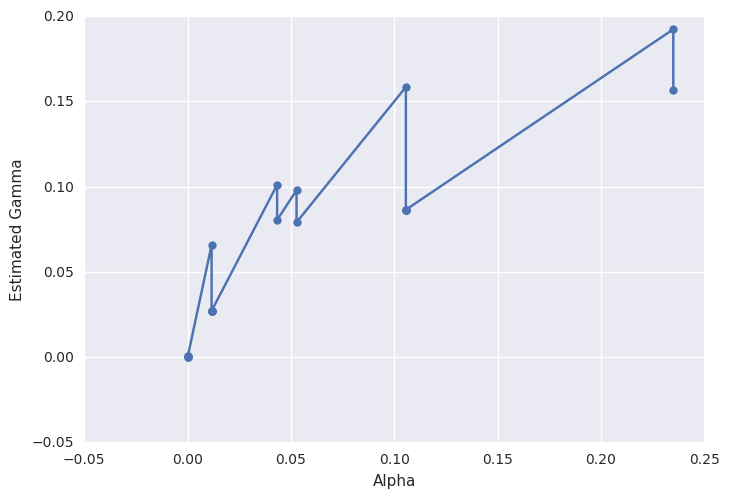

In [4]:
fsr = fsr_fast_pv(pv_orig, m)